In [ ]:
# 한글 패치
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120876 files and direc

# Sklearn

In [ ]:
# 구글 드라이브 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
ai = pd.read_csv('/content/drive/MyDrive/2023AI빅데이터챌린지/A Track 학습셋.csv')
ai.head()

,Log_Number,payload,label_action
0,0,"GET /forum1_professionnel.asp?n=/.\\\""./.\\\""....",System_Cmd_Execution
1,1,POST /owa/auth/logon.aspx?replaceCurrent=1%22%...,System_Cmd_Execution
2,2,GET /goods/goods_search?display_type=list&arr_...,SQL_Injection
3,3,GET / HTTP/1.1\r\n\r\n,HOST_Scan
4,4,GET /sub_04_1_read.php?page=1&id=31%29%3BSELEC...,System_Cmd_Execution


In [ ]:
ai = ai[['payload', 'label_action']]
ai

,payload,label_action
0,"GET /forum1_professionnel.asp?n=/.\\\""./.\\\""....",System_Cmd_Execution
1,POST /owa/auth/logon.aspx?replaceCurrent=1%22%...,System_Cmd_Execution
2,GET /goods/goods_search?display_type=list&arr_...,SQL_Injection
3,GET / HTTP/1.1\r\n\r\n,HOST_Scan
4,GET /sub_04_1_read.php?page=1&id=31%29%3BSELEC...,System_Cmd_Execution
...,...,...
44995,GET /app/javascript/js/skin-responsive.js?v=%3...,System_Cmd_Execution
44996,GET /board/?category=type+%25SYSTEMROOT%25%5Cw...,System_Cmd_Execution
44997,POST /sub_02_4.php HTTP/1.1\r\nContent-Length:...,SQL_Injection
44998,GET /admin/myadmin HTTP/1.1\r\nHost: lab.colle...,Path_Disclosure


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in ai.columns:
    ai[col] = labelencoder.fit_transform(ai[col])
ai.head()

,payload,label_action
0,7469,7
1,30839,7
2,9270,6
3,177,3
4,20554,7


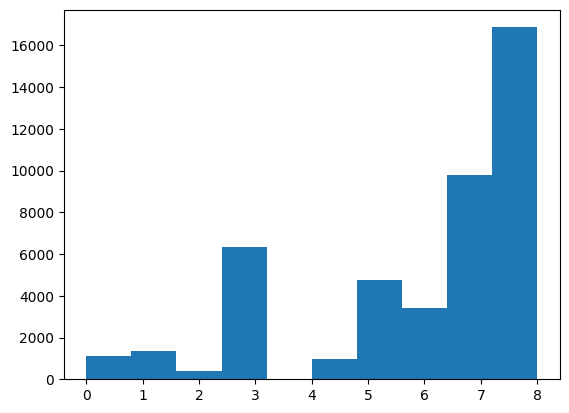

In [ ]:
# x와 y를 분리시킨 후 x를 정규화함.
y = ai['label_action'].values
x = ai.drop(['label_action'], axis=1)
x = x.values
x = (x - x.min()) / (x.max() - x.min())

import matplotlib.pyplot as plt

plt.hist(y)
plt.show()

In [ ]:
# 훈련 / 테스트 데이터셋 분리
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2,random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=9)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=9)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_train)
print(y_train)

(36000, 1) (36000, 9)
[[0.89333291]
 [0.39053663]
 [0.80290939]
 ...
 [0.15483222]
 [0.75452432]
 [0.05623979]]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
model = tf.keras.Sequential([
                               tf.keras.layers.Dense(units=48, activation='relu', input_shape=(1,)),
                               tf.keras.layers.Dense(units=24, activation='relu'),
                               tf.keras.layers.Dense(units=12, activation='relu'),
                               tf.keras.layers.Dense(units=9, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
                loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                96        
                                                                 
 dense_1 (Dense)             (None, 24)                1176      
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 9)                 117       
                                                                 
Total params: 1689 (6.60 KB)
Trainable params: 1689 (6.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(x_train.shape)

(36000, 1)


In [ ]:
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
844/844 [==============================] - 4s 3ms/step - loss: 0.3199 - accuracy: 0.3541 - val_loss: 0.2851 - val_accuracy: 0.3746
Epoch 2/25
844/844 [==============================] - 2s 3ms/step - loss: 0.2804 - accuracy: 0.4058 - val_loss: 0.2747 - val_accuracy: 0.4093
Epoch 3/25
844/844 [==============================] - 3s 3ms/step - loss: 0.2737 - accuracy: 0.4124 - val_loss: 0.2713 - val_accuracy: 0.4103
Epoch 4/25
844/844 [==============================] - 2s 2ms/step - loss: 0.2687 - accuracy: 0.4159 - val_loss: 0.2652 - val_accuracy: 0.4406
Epoch 5/25
844/844 [==============================] - 2s 3ms/step - loss: 0.2635 - accuracy: 0.4390 - val_loss: 0.2604 - val_accuracy: 0.4413
Epoch 6/25
844/844 [==============================] - 2s 2ms/step - loss: 0.2600 - accuracy: 0.4441 - val_loss: 0.2576 - val_accuracy: 0.4539
Epoch 7/25
844/844 [==============================] - 2s 2ms/step - loss: 0.2578 - accuracy: 0.4445 - val_loss: 0.2565 - val_accuracy: 0.4419
Epoch 

In [ ]:
model.evaluate(x_test, y_test)

282/282 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 0.5073


[0.24258872866630554, 0.5073333382606506]

# SVM

In [ ]:
ai_svm = pd.read_csv('/content/drive/MyDrive/2023AI빅데이터챌린지/A Track 학습셋.csv')
ai_svm.head()

,Log_Number,payload,label_action
0,0,"GET /forum1_professionnel.asp?n=/.\\\""./.\\\""....",System_Cmd_Execution
1,1,POST /owa/auth/logon.aspx?replaceCurrent=1%22%...,System_Cmd_Execution
2,2,GET /goods/goods_search?display_type=list&arr_...,SQL_Injection
3,3,GET / HTTP/1.1\r\n\r\n,HOST_Scan
4,4,GET /sub_04_1_read.php?page=1&id=31%29%3BSELEC...,System_Cmd_Execution


In [ ]:
print(ai_svm)

       Log_Number                                            payload  \
0               0  GET /forum1_professionnel.asp?n=/.\\\"./.\\\"....   
1               1  POST /owa/auth/logon.aspx?replaceCurrent=1%22%...   
2               2  GET /goods/goods_search?display_type=list&arr_...   
3               3                             GET / HTTP/1.1\r\n\r\n   
4               4  GET /sub_04_1_read.php?page=1&id=31%29%3BSELEC...   
...           ...                                                ...   
44995       44995  GET /app/javascript/js/skin-responsive.js?v=%3...   
44996       44996  GET /board/?category=type+%25SYSTEMROOT%25%5Cw...   
44997       44997  POST /sub_02_4.php HTTP/1.1\r\nContent-Length:...   
44998       44998  GET /admin/myadmin HTTP/1.1\r\nHost: lab.colle...   
44999       44999  GET /goods/goods_search?display_type=list&arr_...   

               label_action  
0      System_Cmd_Execution  
1      System_Cmd_Execution  
2             SQL_Injection  
3              

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ai_svm['payload'], ai_svm['label_action'], test_size = 0.2)

In [ ]:
print(X_train)

44623    GET /sub_04_2.php HTTP/1.1\r\nHost: lab.colleg...
44106    GET /favicon.ico HTTP/1.1\r\nHost: www.college...
36874    POST /admin/login.php HTTP/1.0\r\nHost: 10.0.1...
27153                               GET / HTTP/1.1\r\n\r\n
15392    POST /board/?category&goods_seq&id=goods_qna&i...
                               ...                        
33269    GET /admin/.bash_history HTTP/1.1\r\nHost: lab...
23403    GET /goods/new_arrivals?event=&filter_display=...
17335    GET /.gitignore HTTP/1.1\r\nContent-Type: appl...
181      GET /goods/search?event=&filter_display=lattic...
10620                               GET / HTTP/1.1\r\n\r\n
Name: payload, Length: 36000, dtype: object


In [ ]:
print(y_train)

44623      Vulnerability_Scan
44106               HOST_Scan
36874      Vulnerability_Scan
27153               HOST_Scan
15392           SQL_Injection
                 ...         
33269         Path_Disclosure
23403    System_Cmd_Execution
17335    Cross_Site_Scripting
181      Cross_Site_Scripting
10620               HOST_Scan
Name: label_action, Length: 36000, dtype: object


In [ ]:
labelencoder=LabelEncoder()
for col in ai_svm.columns:
    ai_svm[col] = labelencoder.fit_transform(ai_svm[col])
ai_svm.head()

,Log_Number,payload,label_action
0,0,7469,7
1,1,30839,7
2,2,9270,6
3,3,177,3
4,4,20554,7


In [ ]:
ai_svm = ai_svm[['payload', 'label_action']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
encoder = OneHotEncoder(sparse=False)  # sparse=False로 설정하여 밀집 배열로 출력

# 데이터를 원-핫 인코딩
ai_svm2 = encoder.fit_transform(ai_svm)

print("원-핫 인코딩 결과:")
print(ai_svm2)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


원-핫 인코딩 결과:
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
ai_svm2

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ai_svm2['payload'], ai_svm2['label_action'], test_size = 0.2)

IndexError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 캐글

https://www.kaggle.com/code/dsumarks/2-2-sklearn-and-classifiers-url/notebook

In [ ]:
ai_k = pd.read_csv('/content/drive/MyDrive/2023AI빅데이터챌린지/A Track 학습셋.csv')
ai_k.head(15)

,Log_Number,payload,label_action
0,0,"GET /forum1_professionnel.asp?n=/.\\\""./.\\\""....",System_Cmd_Execution
1,1,POST /owa/auth/logon.aspx?replaceCurrent=1%22%...,System_Cmd_Execution
2,2,GET /goods/goods_search?display_type=list&arr_...,SQL_Injection
3,3,GET / HTTP/1.1\r\n\r\n,HOST_Scan
4,4,GET /sub_04_1_read.php?page=1&id=31%29%3BSELEC...,System_Cmd_Execution
5,5,POST /member/login HTTP/1.1\r\nContent-Length:...,Vulnerability_Scan
6,6,GET /board/?category=&gdviewer=1&goods_seq=69&...,System_Cmd_Execution
7,7,GET /board/board_list?code=welfare&search_type...,SQL_Injection
8,8,GET /vendor/phpunit/phpunit/src/Util/PHP/eval-...,HOST_Scan
9,9,GET / HTTP/1.1\r\n\r\n,HOST_Scan


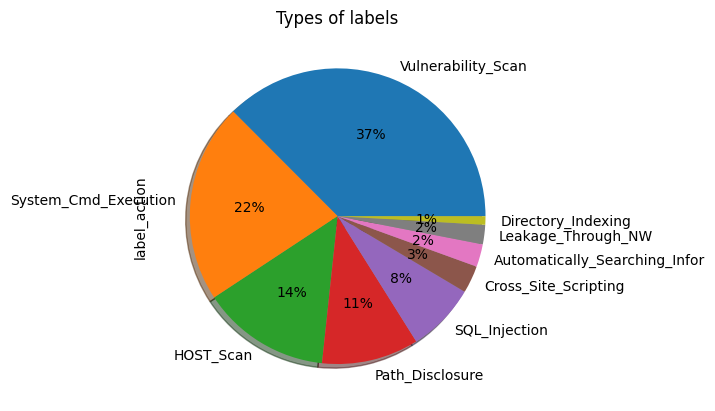

In [ ]:
plt.figure()

ai_k['label_action'].value_counts().plot(kind='pie', autopct= '%1.0f%%', shadow=True)
plt.title('Types of labels')
plt.show()

In [ ]:
# TF-IDF값으로 변환하여 텍스트데이터를 수치화 시킨다.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(ai_k['payload'])
X.shape

(45000, 26227)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, ai_k['label_action'], test_size=0.2, random_state=1337) #Default is test_size = 0.25

#train_sample_size = 1000 #len(X)*0.75
#print(train_sample_size)

print('X_train shape is', X_train.shape)
print('y_train shape is', y_train.shape)
print('X_test shape is', X_test.shape)
print('y_test shape is', y_test.shape)

print(pd.value_counts(y_train))

X_train shape is (36000, 26227)
y_train shape is (36000,)
X_test shape is (9000, 26227)
y_test shape is (9000,)
Vulnerability_Scan               13450
System_Cmd_Execution              7903
HOST_Scan                         5036
Path_Disclosure                   3803
SQL_Injection                     2737
Cross_Site_Scripting              1065
Automatically_Searching_Infor      909
Leakage_Through_NW                 763
Directory_Indexing                 334
Name: label_action, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
#Train sk Model
#model = LogisticRegression()
model = DecisionTreeClassifier()
#model = RandomForestClassifier()

classifier = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cols = list(classifier.classes_)

In [ ]:
import joblib
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred))

# 모델저장
joblib.dump(model, 'trained_model.pkl')

Accuracy:  0.8523333333333334


['trained_model.pkl']

[Text(0, 0.5, 'Automatically_Searching_Infor'),
 Text(0, 1.5, 'Cross_Site_Scripting'),
 Text(0, 2.5, 'Directory_Indexing'),
 Text(0, 3.5, 'HOST_Scan'),
 Text(0, 4.5, 'Leakage_Through_NW'),
 Text(0, 5.5, 'Path_Disclosure'),
 Text(0, 6.5, 'SQL_Injection'),
 Text(0, 7.5, 'System_Cmd_Execution'),
 Text(0, 8.5, 'Vulnerability_Scan')]

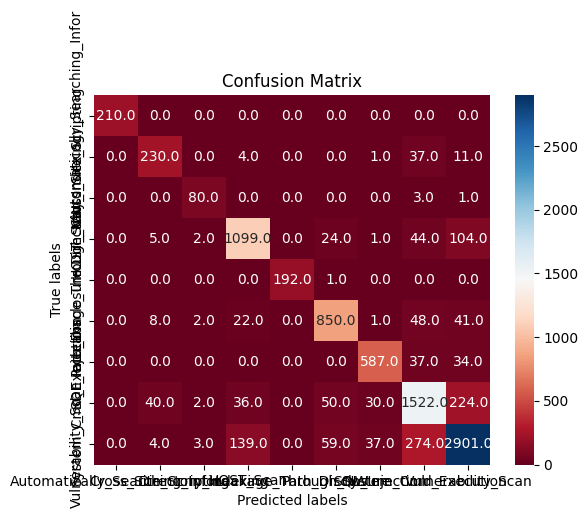

In [ ]:
import seaborn as sns

ax = plt.subplot()
CM_LR = confusion_matrix(y_test,y_pred)
#sns.heatmap(CM_LR, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(CM_LR, annot=True, fmt = ".1f",cmap="RdBu")
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(cols)
ax.yaxis.set_ticklabels(cols)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

Automatically_Searching_Infor       1.00      1.00      1.00       210
         Cross_Site_Scripting       0.80      0.81      0.81       283
           Directory_Indexing       0.90      0.95      0.92        84
                    HOST_Scan       0.85      0.86      0.85      1279
           Leakage_Through_NW       1.00      0.99      1.00       193
              Path_Disclosure       0.86      0.87      0.87       972
                SQL_Injection       0.89      0.89      0.89       658
         System_Cmd_Execution       0.77      0.80      0.79      1904
           Vulnerability_Scan       0.87      0.85      0.86      3417

                     accuracy                           0.85      9000
                    macro avg       0.88      0.89      0.89      9000
                 weighted avg       0.85      0.85      0.85      9000



# 예선

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# 학습 데이터 로드
ai_training = pd.read_csv('/content/drive/MyDrive/2023AI빅데이터챌린지/A Track 학습셋.csv')

# 테스트 데이터 로드
ai_test = pd.read_csv('/content/drive/MyDrive/2023AI빅데이터챌린지/A Track 예선 문제.csv')

# TF-IDF 변환
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(ai_training['payload'])
X_test = vectorizer.transform(ai_test['payload'])

# 학습 데이터의 라벨
y_train = ai_training['label_action']

# 모델 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
predictions = model.predict(X_test)

In [ ]:
# 예측 결과를 테스트 데이터에 추가
ai_test['predictions'] = predictions

In [ ]:
# 데이터 확인
ai_test

,Log_Number,payload,predictions
0,0,GET /jsp-examples/ HTTP/1.1\r\nContent-Length:...,Path_Disclosure
1,1,POST /member/login.php HTTP/1.0\r\nHost: 10.0....,HOST_Scan
2,2,GET /phpBB/index.php?Nikto=Forums&file=viewtop...,Vulnerability_Scan
3,3,GET /stats/search_auto_complete?keyword=%22%3E...,System_Cmd_Execution
4,4,GET /board/?category=%3Bsleep+15%3B&goods_seq=...,System_Cmd_Execution
...,...,...,...
9972,9972,GET /goods/goods_search?display_type=list&arr_...,Vulnerability_Scan
9973,9973,POST /member/login HTTP/1.0\r\nHost: 10.0.17.1...,HOST_Scan
9974,9974,POST /myinfo.php HTTP/1.1\r\nContent-Length: 8...,SQL_Injection
9975,9975,GET /goods/goods_search?display_type=list&arr_...,Vulnerability_Scan


In [ ]:
# ai_test 데이터프레임을 CSV 파일로 저장
ai_test.to_csv('A_Track_할수있조.csv', index=False)